In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams['figure.dpi'] = 100

In [3]:
def compute_heston_stock_price2(s0, Mu, Rho, v0, Theta, Kappa, Epsilon, Trading_Days, Time, Number_of_simulations):
    
    # Returns an N-dimentional array of volatility
    # dv = Kappa(Theta - v(t))dt + epsilon*sqrt(v(t))dX
    # dS = (Mu-(1/2)*v(t))dt+sqrt(v(t))dX
    # dX computed as sqrt(dt)*random.normal()
    
    STORAGE_VOL = np.full(shape=(Trading_Days*Time,Number_of_simulations), fill_value=np.float(v0)) 
    STORAGE_STOCK = np.full(shape=(Trading_Days*Time,Number_of_simulations), fill_value=np.float(v0)) 
    dt = 1/(Trading_Days*Time)
    for Simulation in range(Number_of_simulations):
        mu = np.array([0,0])
        covariance_matrix  = np.array([[1, Rho] , [Rho , 1]])
        W = np.sqrt(dt)*np.random.multivariate_normal(mu, covariance_matrix, size=Trading_Days*Time)        
        dX_vol = W[:,0]
        dX_Stock = W[:,1]
        Current_vol_simulation, Current_stock_simulation = np.empty(Trading_Days*Time), np.empty(Trading_Days*Time)
        Current_vol_simulation[0], Current_stock_simulation[0] = v0, s0
        for index in range(1, len(Current_stock_simulation)):
            dV = Kappa*(Theta-Current_vol_simulation[index-1])*dt + np.sqrt(Current_vol_simulation[index-1])*Epsilon*dX_vol[index]
            dS = Current_stock_simulation[index-1]*np.exp((Mu - (0.5 * Current_vol_simulation[index-1]))*dt + np.sqrt(Current_vol_simulation[index-1])*dX_Stock[index])                                                                                                 
            Current_vol_simulation[index] = float(dV + Current_vol_simulation[index-1])
            Current_stock_simulation[index] = float(dS) # since computed log returns here
        STORAGE_VOL[:,Simulation] = Current_vol_simulation
        STORAGE_STOCK[:,Simulation] = Current_stock_simulation      
    return STORAGE_VOL, STORAGE_STOCK


def calculate_payoff_call(Price_at_exp, Strike):
    # Returns a list of the payoff of the option under each simulation
    output = []
    for price in Price_at_exp:
        output.append(np.maximum(price-Strike, 0))
    return output


def calculate_payoff_put(Price_at_exp, Strike):
    # Returns a list of the payoff of the option under each simulation
    output = []
    for price in Price_at_exp:
        output.append(np.maximum(Strike-price, 0))
    return output
    

In [24]:

# Params for the Monte Carlo simulation


MONTE_CARLO_NUMBER_OF_SIMULATIONS = 20000
TRADING_DAYS = 252 # dt 
TIME = 1 # Plots Vol and Stock price in years


""" compute_vol() Parameters """

# Params for the Volatility 

V0 = 0.08 # Initial value of volatility
THETA = 0.1 # Volatility Mean
KAPPA = 3 # Mean reversion speed
EPSILON = 0.25 # Volatility of volatility
RHO = -0.8

""" compute_heston_stock_price() Parameters """

# Stock params

MU = 0.02 # Risk free rate 
S0 = 1   # initial value of stock price 


out = compute_heston_stock_price2(S0, MU, RHO, V0, THETA, KAPPA, EPSILON, TRADING_DAYS, TIME, MONTE_CARLO_NUMBER_OF_SIMULATIONS)
VOL = out[0]
STOCK = out[1]


C:\Users\leopa\AppData\Local\Temp\ipykernel_24172\347572961.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  STORAGE_VOL = np.full(shape=(Trading_Days*Time,Number_of_simulations), fill_value=np.float(v0))
C:\Users\leopa\AppData\Local\Temp\ipykernel_24172\347572961.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  STORAGE_STOCK = np.f

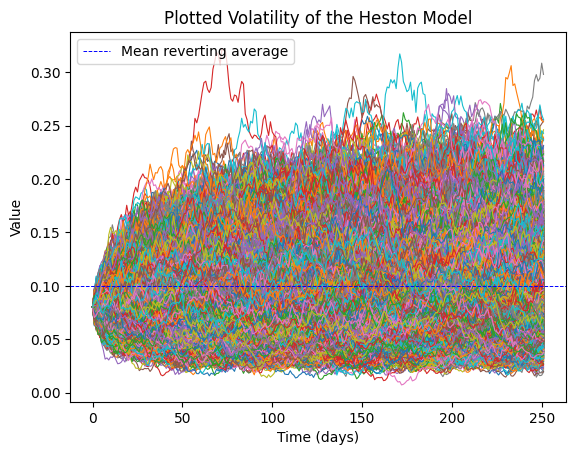

In [25]:
""" Plotting computed volatility """


plt.plot(VOL,linewidth=0.8)
plt.ylabel('Value')
plt.xlabel('Time (days)')
plt.title('Plotted Volatility of the Heston Model')    
plt.axhline(y=THETA, color='b', linestyle='--',label="Mean reverting average",linewidth=0.7)
plt.legend(loc="upper left")
plt.show() 

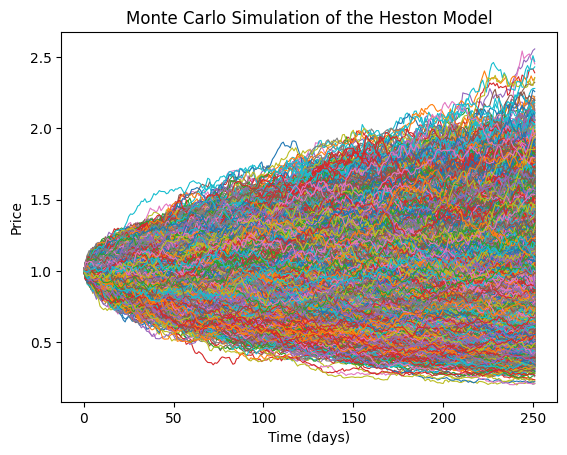

In [26]:
""" Plotting computed Price """


plt.plot(STOCK, linewidth=0.8)
plt.ylabel('Price')
plt.xlabel('Time (days)')
plt.title('Monte Carlo Simulation of the Heston Model')    
plt.show()

expected_payoff = 0.08826865143462694
The price of the call option is 0.08687862288690651 



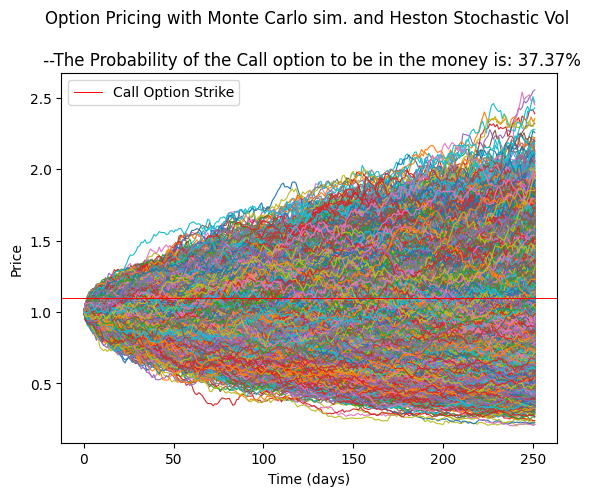

In [31]:
""" Call Option Pricing """

Strike = 1.10
TTE = 200 # Time to expiry
# Should simulate the Heston stock Price for longer than TTE! 

Prices_at_exp = list(STOCK[TRADING_DAYS-1])
Payoff = calculate_payoff_call(Prices_at_exp, Strike)


# Calculating the probability that the option will be in the money

try:
    prob_in_money = 1 - Counter(Payoff).get(float(0))/MONTE_CARLO_NUMBER_OF_SIMULATIONS
except:
    prob_in_money = 0

    
expected_payoff = np.mean(Payoff) # expected payoff knowing option is in the money
option_price = np.exp(-MU*TTE/252) * expected_payoff

print(f"expected_payoff = {expected_payoff}")
print(f"The price of the call option is {option_price} \n")


plt.plot(STOCK, linewidth=0.8)
plt.ylabel('Price')
plt.xlabel('Time (days)')
plt.title(f"Option Pricing with Monte Carlo sim. and Heston Stochastic Vol \n \n --The Probability of the Call option to be in the money is: {round(100*prob_in_money, 4)}%")    
plt.axhline(y=Strike, color='r', linestyle='-',label="Call Option Strike", linewidth=0.7)
plt.legend(loc="upper left")
plt.show()

expected_payoff = 0.16729351472565895
The price of the put option is 0.16547017031613 



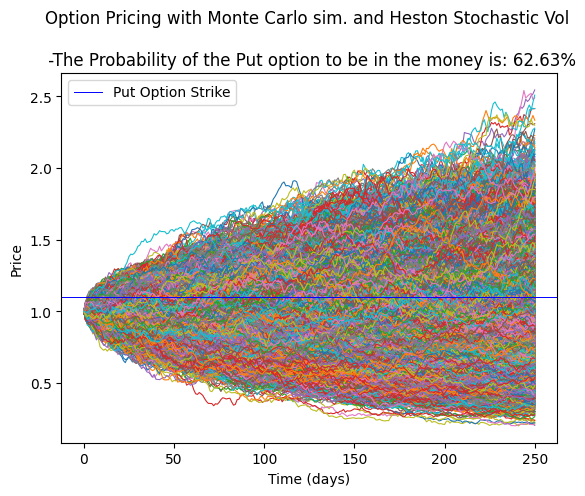

In [32]:
""" Put Option Pricing """

Strike = 1.1
TTE = 200 # Time to expiry (in days)
# Should simulate the Heston stock Price for longer than TTE! 

Prices_at_exp = list(STOCK[TRADING_DAYS-1])
Payoff = calculate_payoff_put(Prices_at_exp, Strike)



# Calculating the probability that the option will be in the money

try:
    Prob_in_money = 1 - Counter(Payoff).get(float(0))/MONTE_CARLO_NUMBER_OF_SIMULATIONS
except: # if none in the money
    Prob_in_money = 0

    
expected_payoff = np.mean(Payoff) # expected payoff knowing  option is in the money
option_price = np.exp(-MU* TTE/365) * expected_payoff


print(f"expected_payoff = {expected_payoff}")
print(f"The price of the put option is {option_price} \n")


plt.plot(STOCK[0:TRADING_DAYS-1], linewidth=0.8)
plt.ylabel('Price')
plt.xlabel('Time (days)')
plt.title(f"Option Pricing with Monte Carlo sim. and Heston Stochastic Vol \n \n -The Probability of the Put option to be in the money is: {round(100*Prob_in_money, 4)}%")    
plt.axhline(y=Strike, color='b', linestyle='-',label="Put Option Strike", linewidth=0.7)
plt.legend(loc="upper left")
plt.show()